In [13]:
using JuMP, Ipopt, Plots

In [14]:
simple_dynopt_1 = Model(solver=IpoptSolver());

### Process data

In [15]:
np      = 1:100;
q       = 100
caf     = 1
cainit  = 0.0967
v       = 5000
k       = 2
tf      = 30;

h       = tf/length(np);
time    = Array{Float64}(undef, length(np))
time[1] = 0
for i = 2:length(np)
    time[i] = (i-1)*h
end

In [16]:
@variable(simple_dynopt_1, 0<= ca[np] <= caf, start = 0.5*caf);

In [17]:
@constraint(simple_dynopt_1, c1, ca[1] == cainit);

In [18]:
@NLconstraint(simple_dynopt_1, endca[i in 2:length(np)], ca[i] ==  ca[i-1] + h*(q*(caf-ca[i])/v -k*ca[i]^3  ));


In [19]:
@NLobjective(simple_dynopt_1, Min, 1);

In [20]:
status_simple_dynopt_1 = solve(simple_dynopt_1);

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      199
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       99

Total number of variables............................:      100
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      100
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

In [21]:
println("Status of the problem is: ", status_simple_dynopt_1)

Status of the problem is: Optimal


In [22]:
mytime   = Array{Float64}(undef, length(np))                
cap      = Array{Float64}(undef, length(np))                

for i = 1:length(np)
    mytime[i] = time[i]
    cap[i]  = getvalue(ca[i])                 
end    


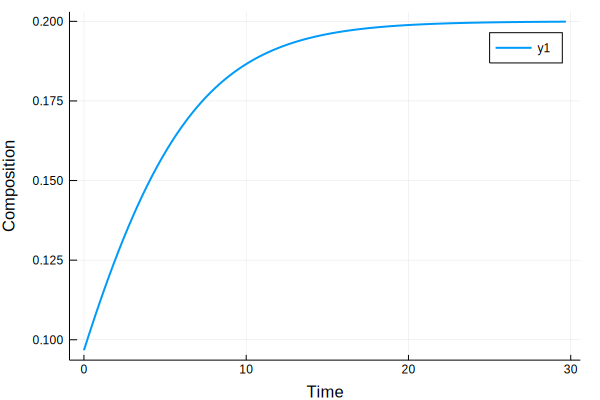

In [23]:
plot(mytime,cap,lw=2,xlabel="Time",ylabel="Composition")

In [24]:
cap[1]

0.0967